<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. パターン認識って何？


## 1.1 パターン認識とは


### 画像認識の例

ニューラルネットワークの事前学習モデルVGG16を用いて物体認識（[Imagenet 1000クラス](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)）を行う例を示します。現段階ではコードをすべて理解する必要はありません。デモコードとして、これぐらいの分量のコードでこの程度のことができる、と理解してください。

In [1]:
# サンプル画像を取得
!wget https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg

--2023-06-10 06:52:05--  https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg [following]
--2023-06-10 06:52:05--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82429 (80K) [image/jpeg]
Saving to: ‘fruits.jpg’

fruits.jpg          100%[===================>]  80.50K  --.-KB/s    in 0.008s  

2023-06-10 06:52:05 (9.82 MB/s) - ‘fruits.jpg’ saved [82429/82429]



35363/35363 [==============================] - 0s 0us/step
('n07749582', 'lemon', 0.92894334)
('n07747607', 'orange', 0.06921512)
('n07753275', 'pineapple', 0.00048059406)
('n07753592', 'banana', 0.00039395067)
('n07717410', 'acorn_squash', 0.00025986356)
('n07716906', 'spaghetti_squash', 0.00013889001)
('n07718472', 'cucumber', 0.00011660662)
('n07753113', 'fig', 8.225509e-05)
('n07742313', 'Granny_Smith', 8.022048e-05)
('n07716358', 'zucchini', 7.0969814e-05)


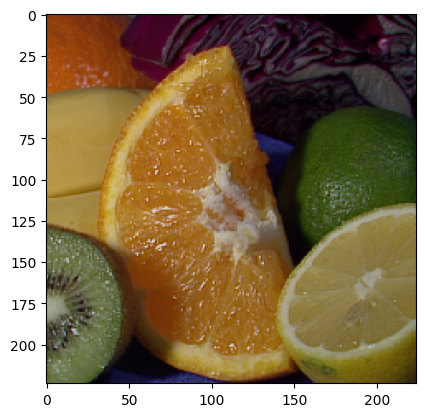

In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

"""
ImageNetで学習済みのVGG16モデルを使って入力画像のクラスを予測する
"""

# 学習済みのVGG16をロード
model = VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)

# 画像ファイルを読み込む
# 画像サイズをVGG16のデフォルトである224x224にリサイズ
filename = 'fruits.jpg'
img = image.load_img(filename, target_size=(224, 224))
plt.imshow(img)

# 読み込んだPIL形式の画像をarrayに変換
x = image.img_to_array(img)

# 3次元テンソル（rows, cols, channels) を
# 4次元テンソル (samples, rows, cols, channels) に変換
# 入力画像は1枚なのでsamples=1でよい
x = np.expand_dims(x, axis=0)

# Top-10のクラスを予測する
# VGG16の1000クラスはdecode_predictions()で文字列に変換される
preds = model.predict(preprocess_input(x))
results = decode_predictions(preds, top=10)[0]
for result in results:
    print(result)

### 音声認識の例

Pythonの音声認識パッケージで日本語音声認識を行います。これもデモコードとして見てください。

In [3]:
!pip install speechrecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 38.1 MB/s eta 0:00:00


In [4]:
# サンプル音声を取得
!wget https://github.com/kan-bayashi/asj-espnet2-tutorial/raw/master/static/audios/ja_sample.wav

--2023-06-10 06:52:44--  https://github.com/kan-bayashi/asj-espnet2-tutorial/raw/master/static/audios/ja_sample.wav
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kan-bayashi/asj-espnet2-tutorial/master/static/audios/ja_sample.wav [following]
--2023-06-10 06:52:44--  https://raw.githubusercontent.com/kan-bayashi/asj-espnet2-tutorial/master/static/audios/ja_sample.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145244 (142K) [audio/wav]
Saving to: ‘ja_sample.wav’

ja_sample.wav       100%[===================>] 141.84K  --.-KB/s    in 0.01s   

2023-06-10 06:52:44 (9.26 MB/s) - ‘ja_sample

In [5]:
import IPython.display
IPython.display.Audio("ja_sample.wav")

In [6]:
import speech_recognition as sr

filename = 'ja_sample.wav'
r = sr.Recognizer()
with sr.AudioFile(filename) as source:
    audio = r.record(source)
print("認識結果：" + r.recognize_google(audio, language='ja-JP'))

認識結果：演奏会の切符は当事務所で販売しています


## 1.4 特徴抽出部


### irisデータで3dプロット

irisデータはアヤメの種類を識別するための、花びらの幅・長さ、萼の幅・長さからなる4次元データです。このデータから3次元を選び出し、特徴空間上にプロットして可視化してみます。

In [7]:
# irisデータの取得
!wget https://archive.ics.uci.edu/static/public/53/iris.zip && unzip iris.zip

--2023-06-10 06:52:57--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2023-06-10 06:52:57 (302 MB/s) - ‘iris.zip’ saved [3738]

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


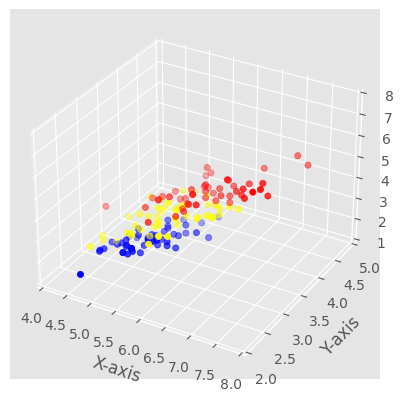

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# ファイル読み込み
df = pd.read_csv('iris.data', header=None, names=['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'target'])
d = df.to_numpy()

# グラフ作成
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# 軸ラベルの設定
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# 表示範囲の設定
ax.set_xlim(4, 8)
ax.set_ylim(2, 5)
ax.set_zlim(1, 8)

# 抽出条件設定
d1 = df[df['target']=='Iris-setosa'].to_numpy()
d2 = df[df['target']=='Iris-versicolor'].to_numpy()
d3 = df[df['target']=='Iris-virginica'].to_numpy()

# グラフ描画
ax.scatter(d1[:,0], d1[:,1], d1[:,2], "o", color="#0000ff")
ax.scatter(d2[:,0], d2[:,1], d2[:,2], "o", color="#ffff00")
ax.scatter(d3[:,0], d3[:,1], d3[:,2], "o", color="#ff0000")

## 1.5 識別部と識別辞書



### 例題1.1

以下の図に示すプロトタイプと入力パターンを用いて、最近傍決定則による識別を行え。

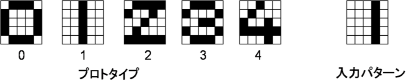

例題1.1の処理をPythonでコーディングせよ．


In [ ]:
import numpy as np

proto = np.array(
    [[[0,1,1,1,0],
      [1,0,0,0,1],
      [1,0,0,0,1],
      [1,0,0,0,1],
      [0,1,1,1,0]],
     [[0,0,1,0,0],
      [0,0,1,0,0],
      [0,0,1,0,0],
      [0,0,1,0,0],
      [0,0,1,0,0]],
     [[0,1,1,1,1],
      [1,0,0,1,0],
      [0,0,1,0,0],
      [0,1,0,0,0],
      [1,1,1,1,1]],
     [[0,1,1,1,0],
      [1,0,0,0,1],
      [0,0,1,1,0],
      [1,0,0,0,1],
      [0,1,1,1,0]],
     [[0,0,1,0,0],
      [0,1,0,0,0],
      [1,0,0,1,0],
      [1,1,1,1,1],
      [0,0,0,1,0]]])
x = np.array(
     [[0,0,0,1,0],
      [0,0,0,1,0],
      [0,0,0,1,0],
      [0,0,0,1,0],
      [0,0,0,1,0]])

# 以下にxとproto[i]との距離を求めて最小値のインデックスを表示する
# コードを記述する


## 解答例

In [ ]:
d = [np.linalg.norm(x - p) for p in proto]
print(f'result: {np.argmin(d)}')

result: 4
